In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from datetime import datetime
import yfinance as yf

In [5]:
yf.pdr_override()
start = '2010-1-1'
end = '2023-4-5'
df = pdr.get_data_yahoo('TCS.NS', start=start,end=end)
df = df.reset_index()

[*********************100%***********************]  1 of 1 completed


In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3267,2023-03-27,3135.000000,3152.750000,3106.000000,3122.300049,3122.300049,1524217
3268,2023-03-28,3127.000000,3149.550049,3110.149902,3115.899902,3115.899902,1303530
3269,2023-03-29,3129.000000,3150.000000,3104.100098,3138.899902,3138.899902,1740616
3270,2023-03-31,3189.949951,3213.000000,3152.000000,3205.899902,3205.899902,2382581
3271,2023-04-03,3224.949951,3224.949951,3173.750000,3200.000000,3200.000000,1521830


In [17]:
df = df.drop(['Date','Adj Close'], axis =1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


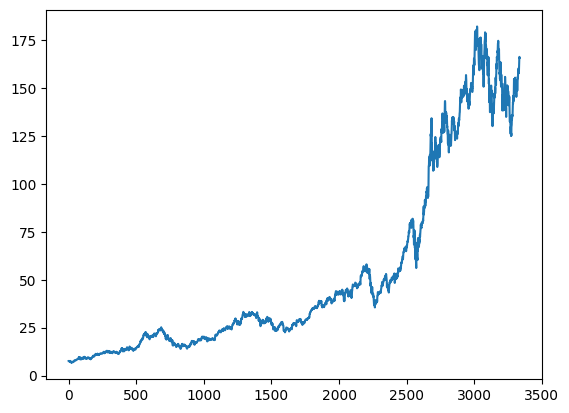

In [18]:
plt.plot(df.Close)

In [19]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3331    144.833499
3332    145.068299
3333    145.333499
3334    145.605999
3335    145.867299
Name: Close, Length: 3336, dtype: float64

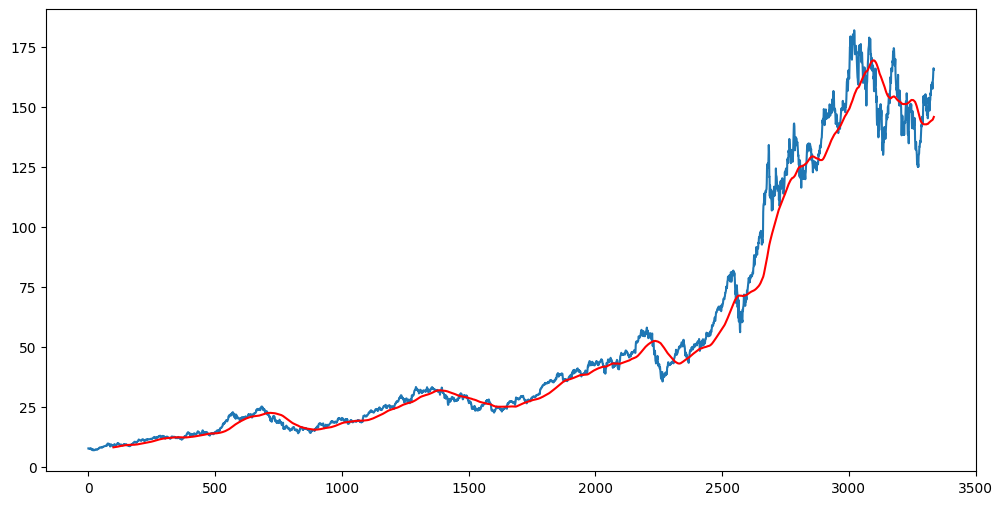

In [20]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [21]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3331    148.185149
3332    148.337549
3333    148.498249
3334    148.651950
3335    148.829800
Name: Close, Length: 3336, dtype: float64

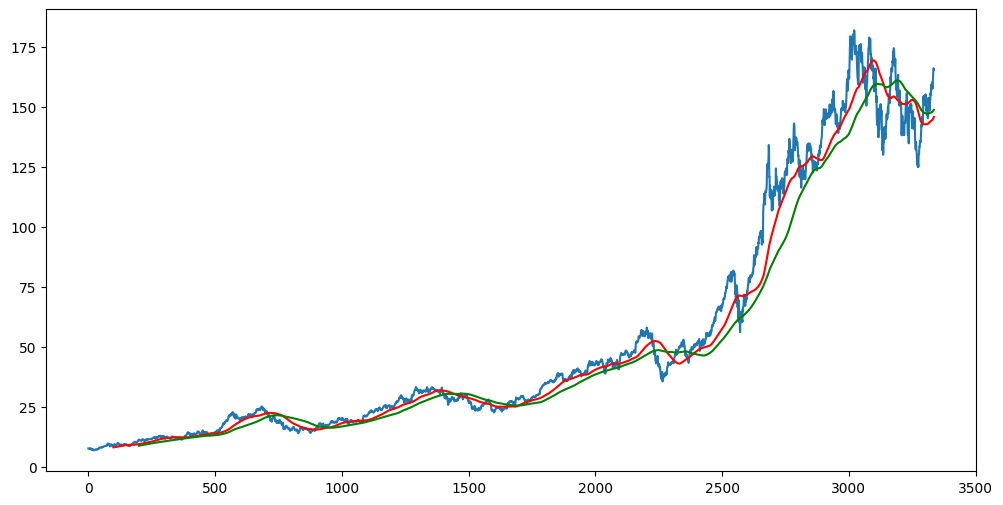

In [22]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200,'g')

In [23]:
df.shape
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3331,159.369995,161.050003,159.350006,160.770004,51305700
3332,161.529999,162.470001,161.270004,162.360001,49501700
3333,162.440002,165.000000,161.910004,164.899994,68694700
3334,164.270004,166.289993,164.220001,166.169998,56976200


In [24]:
df = pd.DataFrame(df['Close'])

In [25]:
# Split data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

# data_training_close = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
# data_testing_close = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

# data_training_high = pd.DataFrame(df['High'][0:int(len(df)*0.70)])
# data_testing_high = pd.DataFrame(df['High'][int(len(df)*0.70):int(len(df))])

# data_training_low = pd.DataFrame(df['Low'][0:int(len(df)*0.70)])
# data_testing_low = pd.DataFrame(df['Low'][int(len(df)*0.70):int(len(df))])


In [26]:
print(data_training.tail())
print(data_training.tail())


          Close
2330  50.025002
2331  49.875000
2332  50.154999
2333  49.737499
2334  49.717499
          Close
2330  50.025002
2331  49.875000
2332  50.154999
2333  49.737499
2334  49.717499


In [27]:
data_testing.head()

,Close
2335,49.807499
2336,49.812500
2337,50.782501
2338,50.965000
2339,51.132500


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [29]:
data_training_array = scaler.fit_transform(data_training)




In [30]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train

array([[[0.01533047],
        [0.01558878],
        [0.01320823],
        ...,
        [0.03819355],
        [0.03711847],
        [0.03634356]],

       [[0.01558878],
        [0.01320823],
        [0.01293595],
        ...,
        [0.03711847],
        [0.03634356],
        [0.04279409]],

       [[0.01320823],
        [0.01293595],
        [0.01391331],
        ...,
        [0.03634356],
        [0.04279409],
        [0.04525843]],

       ...,

       [[0.80531117],
        [0.77877606],
        [0.80130406],
        ...,
        [0.82862106],
        [0.84377007],
        [0.84083798]],

       [[0.77877606],
        [0.80130406],
        [0.81166398],
        ...,
        [0.84377007],
        [0.84083798],
        [0.84631113]],

       [[0.80130406],
        [0.81166398],
        [0.77418249],
        ...,
        [0.84083798],
        [0.84631113],
        [0.83815024]]])

In [31]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from keras.layers import Reshape

In [32]:
model = Sequential()

model.add(LSTM(units=50, activation="relu", return_sequences = True, input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation="relu", return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation="relu", return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=20, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 20)                8

In [33]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
70/70 [==============================] - 26s 225ms/step - loss: 0.0826
Epoch 2/50
70/70 [==============================] - 19s 269ms/step - loss: 0.0264
Epoch 3/50
70/70 [==============================] - 22s 321ms/step - loss: 0.0229
Epoch 4/50
70/70 [==============================] - 23s 328ms/step - loss: 0.0207
Epoch 5/50
70/70 [==============================] - 17s 240ms/step - loss: 0.0189
Epoch 6/50
70/70 [==============================] - 16s 232ms/step - loss: 0.0151
Epoch 7/50
70/70 [==============================] - 16s 233ms/step - loss: 0.0148
Epoch 8/50
70/70 [==============================] - 16s 227ms/step - loss: 0.0130
Epoch 9/50
70/70 [==============================] - 17s 237ms/step - loss: 0.0112
Epoch 10/50
70/70 [==============================] - 16s 231ms/step - loss: 0.0110
Epoch 11/50
70/70 [==============================] - 18s 257ms/step - loss: 0.0100
Epoch 12/50
70/70 [==============================] - 16s 235ms/step - loss: 0.0092
Epoch 13/50
7

In [34]:
model.save('LSTM_model.h5')

In [57]:
data_testing.head()

,Close
2335,49.807499
2336,49.812500
2337,50.782501
2338,50.965000
2339,51.132500


In [58]:
data_training.tail(100)

,Close
2235,48.382500
2236,46.465000
2237,44.244999
2238,44.195000
2239,43.072498
...,...
2330,50.025002
2331,49.875000
2332,50.154999
2333,49.737499


In [59]:
past_100_days = data_training.tail(100)
print(past_100_days)


          Close
2235  48.382500
2236  46.465000
2237  44.244999
2238  44.195000
2239  43.072498
...         ...
2330  50.025002
2331  49.875000
2332  50.154999
2333  49.737499
2334  49.717499

[100 rows x 1 columns]


In [60]:
final_df = past_100_days.append(data_testing, ignore_index = True)
data_testing

C:\Users\hp\AppData\Local\Temp\ipykernel_4072\3013218201.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


,Close
2335,49.807499
2336,49.812500
2337,50.782501
2338,50.965000
2339,51.132500
...,...
3331,160.770004
3332,162.360001
3333,164.899994
3334,166.169998


In [61]:
final_df

,Close
0,48.382500
1,46.465000
2,44.244999
3,44.195000
4,43.072498
...,...
1096,160.770004
1097,162.360001
1098,164.899994
1099,166.169998


In [62]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.08763335],
       [0.07454126],
       [0.05938379],
       ...,
       [0.88317828],
       [0.89184947],
       [0.88816257]])

In [63]:
input_data.shape

(1101, 1)

In [64]:
x_test = []
y_test = []

for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test,y_test = np.array(x_test), np.array(y_test)

In [65]:
print(x_test.shape)

print(y_test.shape)
x_test

(1001, 100, 1)
(1001,)


array([[[0.08763335],
        [0.07454126],
        [0.05938379],
        ...,
        [0.09973542],
        [0.09688486],
        [0.09674831]],

       [[0.07454126],
        [0.05938379],
        [0.05904241],
        ...,
        [0.09688486],
        [0.09674831],
        [0.0973628 ]],

       [[0.05938379],
        [0.05904241],
        [0.05137833],
        ...,
        [0.09674831],
        [0.0973628 ],
        [0.09739694]],

       ...,

       [[0.70210811],
        [0.70579501],
        [0.70975508],
        ...,
        [0.83367755],
        [0.85498   ],
        [0.865836  ]],

       [[0.70579501],
        [0.70975508],
        [0.67814286],
        ...,
        [0.85498   ],
        [0.865836  ],
        [0.88317828]],

       [[0.70975508],
        [0.67814286],
        [0.7600751 ],
        ...,
        [0.865836  ],
        [0.88317828],
        [0.89184947]]])

In [66]:
y_predicted = model.predict(x_test)

32/32 [==============================] - 2s 74ms/step


In [67]:
y_predicted.shape

(1001, 1)

In [68]:
y_test

array([0.0973628 , 0.09739694, 0.10401981, ..., 0.88317828, 0.89184947,
       0.88816257])

In [69]:
y_predicted

array([[0.08433983],
       [0.08546677],
       [0.08659309],
       ...,
       [0.7664529 ],
       [0.7698746 ],
       [0.7734808 ]], dtype=float32)

In [70]:
scaler.scale_

array([0.00682769])

In [71]:
scaler_factor = 1/0.00682769
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor


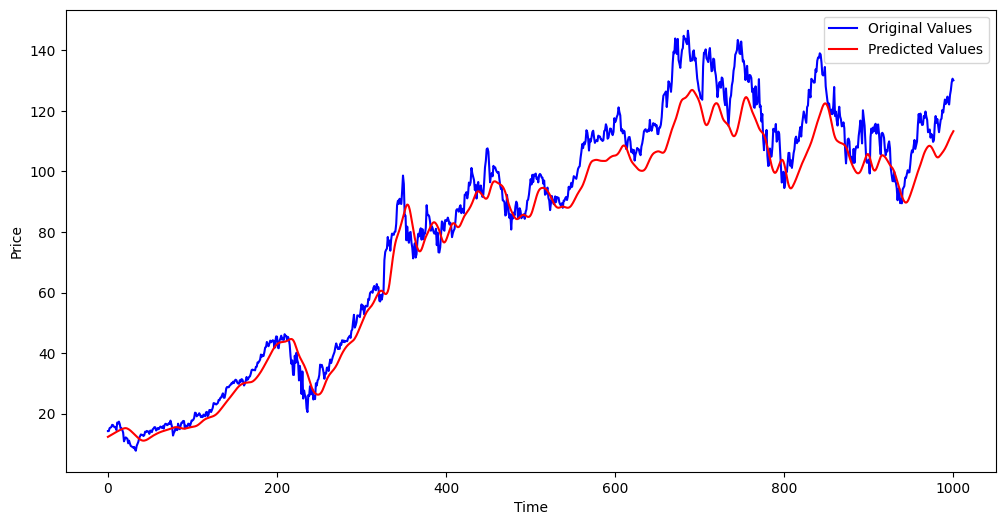

In [72]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = "Original Values")
plt.plot(y_predicted , 'r' ,label = "Predicted Values")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [73]:
y_predicted

array([[ 12.352615],
       [ 12.51767 ],
       [ 12.682633],
       ...,
       [112.256546],
       [112.75769 ],
       [113.285866]], dtype=float32)

In [74]:
from sklearn.metrics import r2_score
predictions = model.predict(x_test)
print(f"Accuracy:-{r2_score(predictions,y_test)}")
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse
# 
# print(f"Accuracy:-{r2_score(predictions,y_test)}")
# rmse=np.sqrt(np.mean(y_predicted-y_test)**2)
# rmse
     

32/32 [==============================] - 2s 73ms/step
Accuracy:--135219.23650579722


30.071710494150167

In [87]:
yf.pdr_override()
start = '2010-1-1'
end = '2023-4-5'
stock = pdr.get_data_yahoo('AAPL', start=start,end=end)


[*********************100%***********************]  1 of 1 completed


In [88]:
new_df = stock.filter(['Close'])

In [89]:
scaler = MinMaxScaler(feature_range=(0,1))
last_60_days=new_df[-200:].values

In [90]:
last_100_days=new_df[-100:].values
last_100_days_scaled=scaler.fit_transform(last_100_days)

X_test=[]
X_test.append(last_100_days_scaled)

X_test=np.array(X_test)

In [83]:
pred_price=model.predict(X_test)

1/1 [==============================] - 0s 47ms/step


In [93]:
#Get the predicted scaled price
pred_price=model.predict(X_test)
    #undo the scaling
pred_price=scaler.inverse_transform(pred_price)
pred_price

1/1 [==============================] - 0s 47ms/step


array([[156.0134]], dtype=float32)

In [92]:
#Get the predicted scaled price
pred_price=model.predict(X_test)
pred_price.shape
#undo the scaling
pred_price = scaler.inverse_transform(pred_price.reshape(-1, 4))
# pred_price=scaler.inverse_transform(pred_price)
# print(pred_price)

1/1 [==============================] - 0s 60ms/step


ValueError: cannot reshape array of size 1 into shape (4)

In [ ]:
model.evaluate(X_test,y_test)